In [598]:
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from highlight_text import fig_text

In [599]:
link = "https://understat.com/player/2371"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Stats Data 
strings = scripts[3].string
# Trim JSON data to understand the code!
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [600]:
shots = pd.DataFrame(data) #Messi's data 
#Data type transformation 
shots['xG'] = shots['xG'].astype('float64')
shots['X'] = shots['X'].astype('float64')
shots['Y'] = shots['Y'].astype('float64')

In [601]:
# Size and color of field 
def soccer_field(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("Error.")
    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0
        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)
    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90
        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)
    else:
        raise NameError("Vertical or Horizontal")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)
    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]
    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]
    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # Goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # Outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]
    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # Goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]
    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]
    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Middle dot and spots for both sides 
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [[lx1, ly1],[lx2, ly2],[lx3, ly3],[lx4, ly4],[lx5, ly5],[lx6, ly6],[lx7, ly7],[lx8, ly8],]
    points = [[pitch_x[6], pitch_y[3]],[pitch_x[2], pitch_y[3]],[pitch_x[4], pitch_y[3]]]
    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]

    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)
    ax.set_aspect("equal")

    return ax

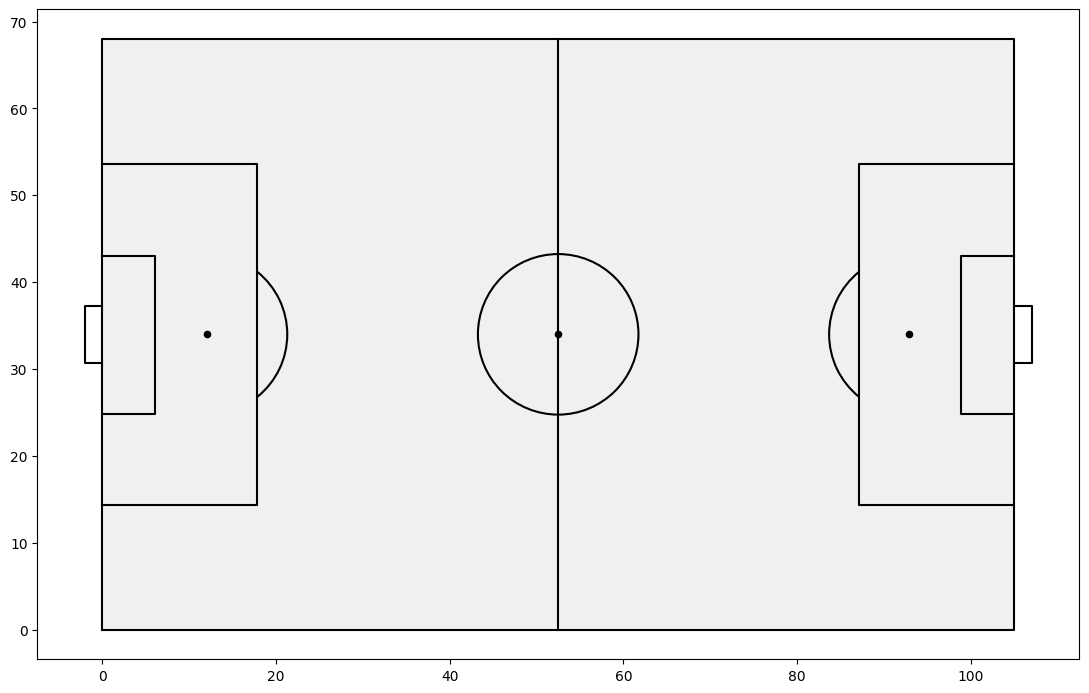

In [602]:
fig, ax = plt.subplots(figsize=(11, 7))
# Horizontal field
soccer_field(orientation="horizontal",aspect="full",line_color="black",ax=ax, axis='on')
plt.tight_layout()

In [603]:
shots['X1'] = (shots['X']/100)*105*100
shots['Y1'] = (shots['Y']/100)*68*100
# Original X and Y
shots['X'] = (shots['X']/100)*105*100
shots['Y'] = (shots['Y']/100)*68*100

In [604]:
total_shots = shots[shots.columns[0]].count().tolist()
xGcum = np.round(max(np.cumsum(shots['xG'])),3).tolist()
xG_per_shot = np.round(max(np.cumsum(shots['xG']))/(shots[shots.columns[0]].count()),3).tolist()
goal = shots[shots['result']=='Goal']
shot_on_target = shots[shots['result']=='ShotOnPost']
blocked_shot = shots[shots['result']=='BlockedShot']
saved_shot = shots[shots['result']=='SavedShot']
missed_shot = shots[shots['result']=='MissedShot']
goals = goal[goal.columns[0]].count().tolist()

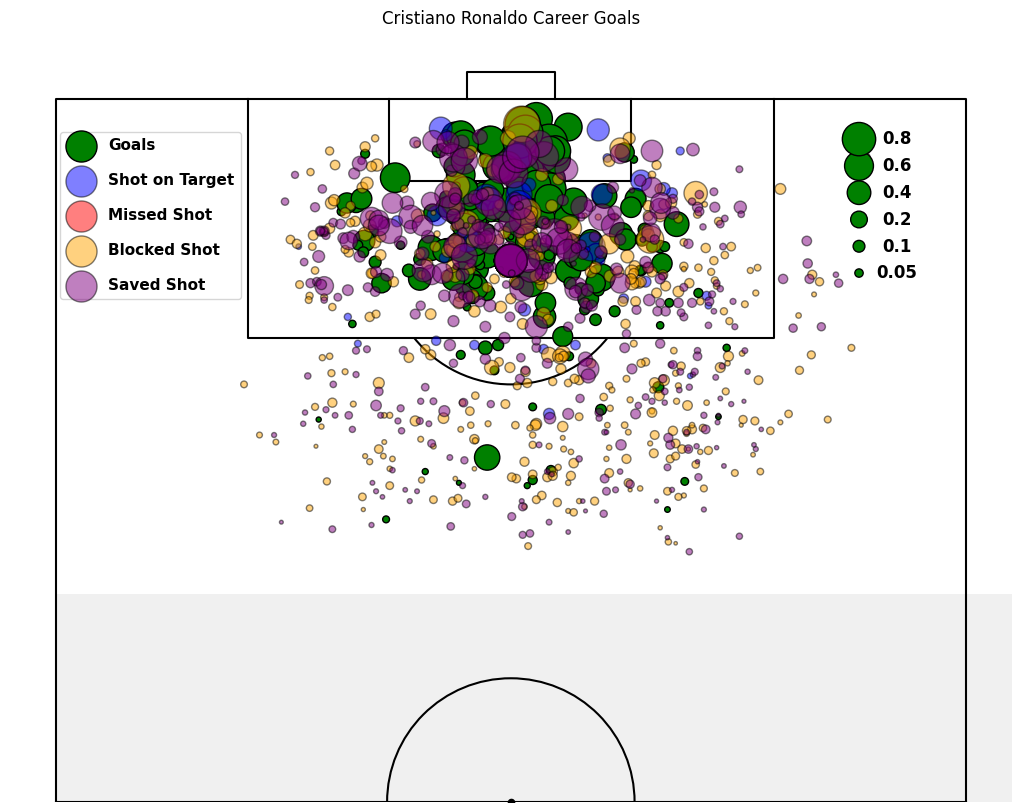

In [605]:
fig, ax = plt.subplots(figsize=(20, 10))
soccer_field(orientation="vertical",aspect="half",line_color="black",ax=ax,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [500 * i for i in z] #used for xGX
color = {'Goal':'green', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnTarget':'Blue'}

# Plotting the goals, the missed chances shot on target, etc 
plt.scatter(y=goal["X1"],x=goal["Y1"],s=goal['xG']*720, marker='o',color='green',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_target["X1"],x=shot_on_target["Y1"],s=shot_on_target['xG']*720, marker='o',color='Blue',edgecolors="black",label='Shot on Target',alpha=0.5)
plt.scatter(y=missed_shot["X1"],x=missed_shot["Y1"],s=missed_shot['xG']*720, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot["X1"],x=blocked_shot["Y1"],s=blocked_shot['xG']*720, marker='o',color='orange',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot["X1"],x=saved_shot["Y1"],s=saved_shot['xG']*720, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)
plt.title("Cristiano Ronaldo Career Goals")

#legend 
legend = ax.legend(loc="upper center",bbox_to_anchor= (0.14, 0.88),labelspacing=1.3,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]
legend.legendHandles[4]._sizes = [500]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="green", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.8, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')

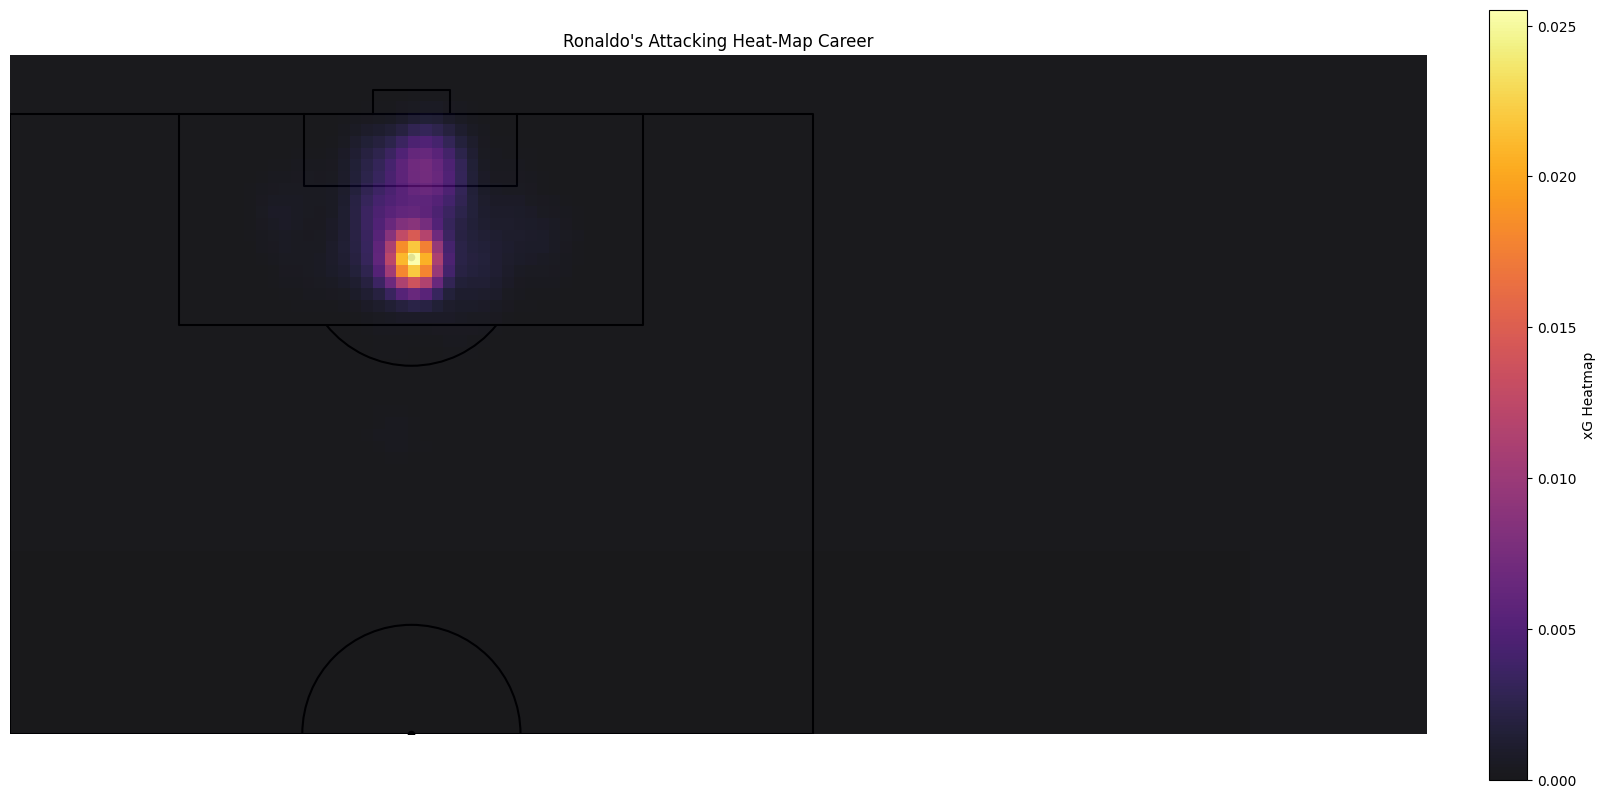

In [606]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Create a grid for the heatmap
x_grid = np.linspace(0, 120, 121)
y_grid = np.linspace(0, 120, 121)
xx, yy = np.meshgrid(x_grid, y_grid)

# Calculate KDE for your data
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([goal['Y1'], goal['X1']])
kernel = gaussian_kde(values, weights=goal['xG'])
zz = np.reshape(kernel(positions), xx.shape)

# Use a colormap with darker colors
cmap = 'inferno'

# Create the soccer field plot
fig, ax = plt.subplots(figsize=(20, 10))
soccer_field(orientation="vertical", aspect="half", line_color="black", ax=ax, axis="off")

# Display the smoothed heatmap with the darker colormap and reduced alpha value
cax = ax.imshow(zz, cmap=cmap, extent=[0, 120, 0, 120], origin='lower', alpha=0.9)  # Adjust alpha here
cbar = plt.colorbar(cax, fraction=0.046, pad=0.04)
cbar.set_label('xG Heatmap')

# Title
plt.title("Ronaldo's Attacking Heat-Map Career")

# Show the plot
plt.show()



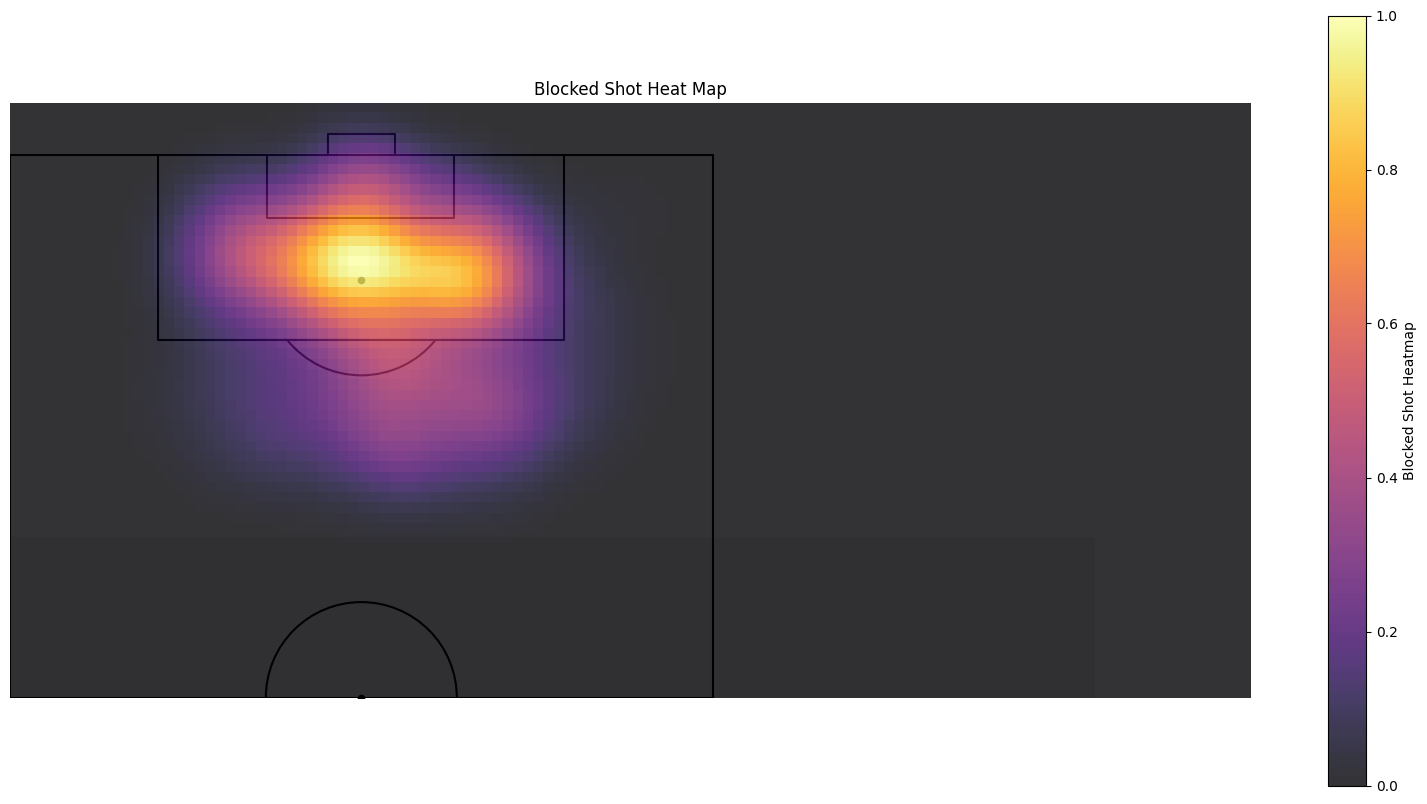

In [607]:
#filter each for a heatmap 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming you have the `soccer_field` function for plotting the pitch

# Filter out blocked shots
blocked_shot = shots[shots['result'] == 'BlockedShot']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))
soccer_field(orientation="vertical", aspect="half", line_color="black", ax=ax, axis="off")

# Create a grid for the heatmap
x_grid = np.linspace(0, 120, 121)
y_grid = np.linspace(0, 120, 121)
xx, yy = np.meshgrid(x_grid, y_grid)

# Calculate KDE for your data
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([blocked_shot['Y1'], blocked_shot['X1']])
kernel = gaussian_kde(values, weights=blocked_shot['xG'])
zz = np.reshape(kernel(positions), xx.shape)

# Use the 'inferno' colormap for the heatmap
cmap = 'inferno'

# Normalize the heatmap values
zz = zz / np.max(zz)

# Mask zero values
zz = np.ma.masked_where(zz == 0, zz)

# Plot the KDE heatmap
cax = ax.imshow(zz, cmap=cmap, extent=[0, 120, 0, 120], origin='lower', alpha = 0.8)

# Add a colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Blocked Shot Heatmap')
plt.title("Blocked Shot Heat Map")

# Show the plot
plt.show()


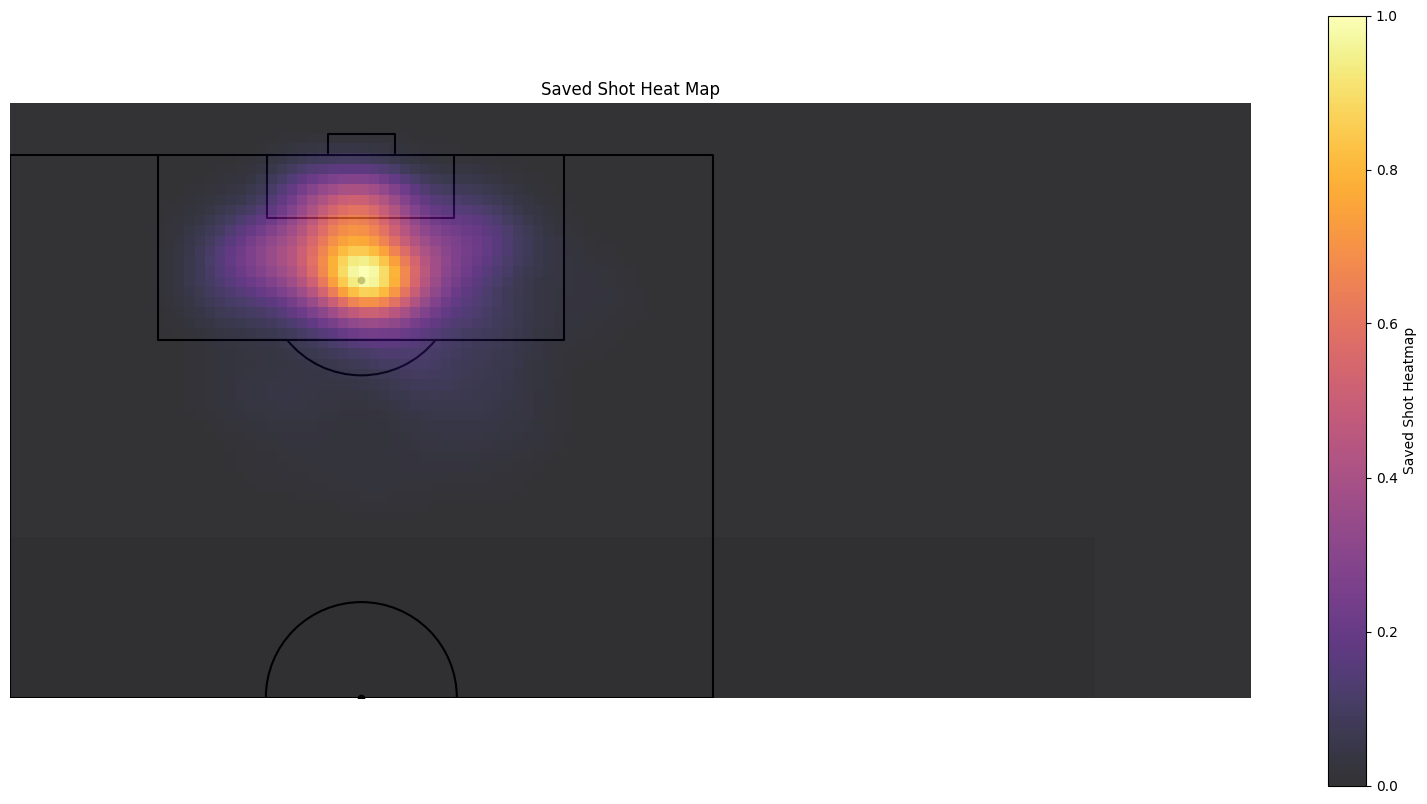

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming you have the `soccer_field` function for plotting the pitch

# Filter out blocked shots
saved_shot = shots[shots['result'] == 'SavedShot']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))
soccer_field(orientation="vertical", aspect="half", line_color="black", ax=ax, axis="off")

# Create a grid for the heatmap
x_grid = np.linspace(0, 120, 121)
y_grid = np.linspace(0, 120, 121)
xx, yy = np.meshgrid(x_grid, y_grid)

# Calculate KDE for your data
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([saved_shot['Y1'], saved_shot['X1']])
kernel = gaussian_kde(values, weights=saved_shot['xG'])
zz = np.reshape(kernel(positions), xx.shape)

# Use the 'inferno' colormap for the heatmap
cmap = 'inferno'

# Normalize the heatmap values
zz = zz / np.max(zz)

# Mask zero values
zz = np.ma.masked_where(zz == 0, zz)

# Plot the KDE heatmap
cax = ax.imshow(zz, cmap=cmap, extent=[0, 120, 0, 120], origin='lower', alpha = 0.8)

# Add a colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Saved Shot Heatmap')
plt.title("Saved Shot Heat Map")



# Show the plot
plt.show()

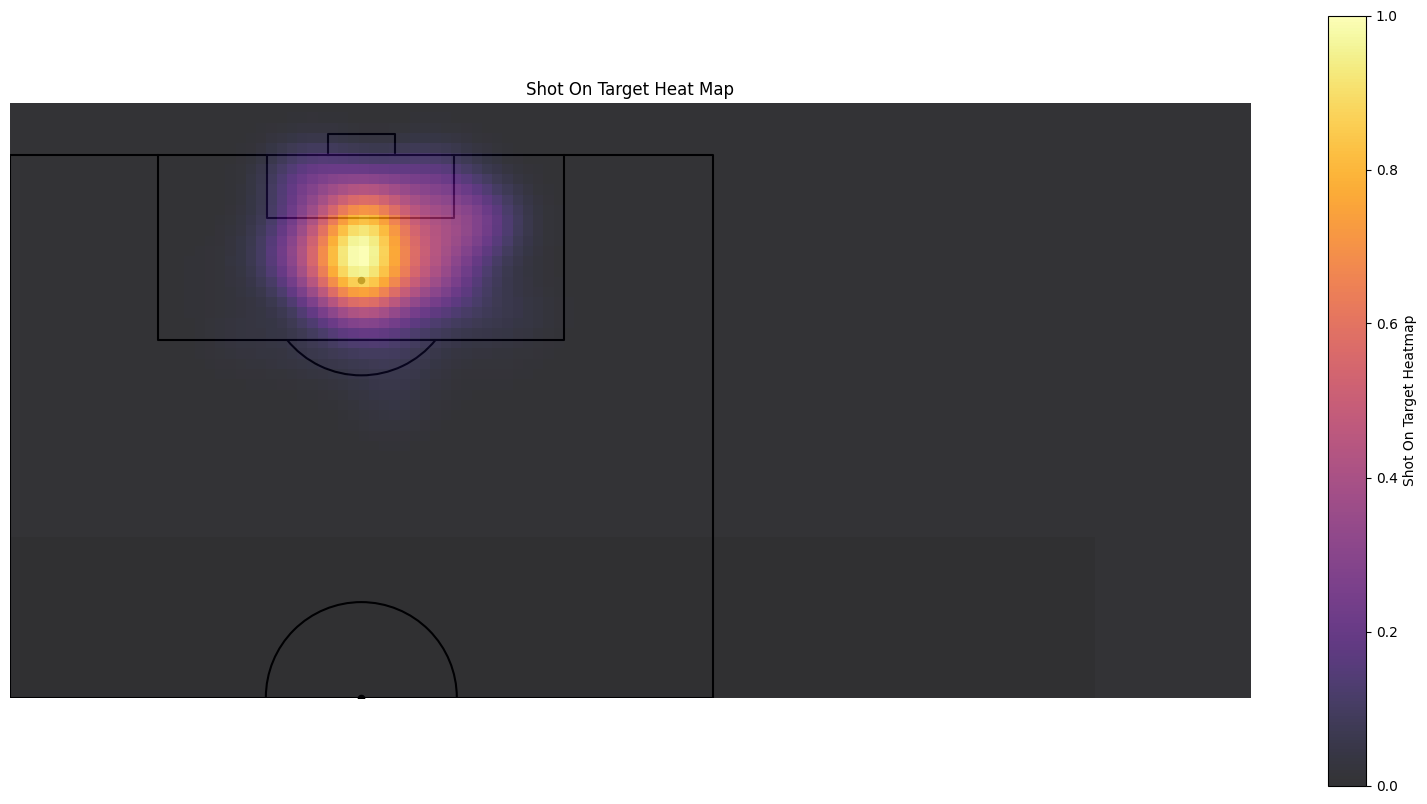

In [609]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming you have the `soccer_field` function for plotting the pitch

# Filter out blocked shots
shot_on_target = shots[shots['result'] == 'ShotOnPost']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))
soccer_field(orientation="vertical", aspect="half", line_color="black", ax=ax, axis="off")

# Create a grid for the heatmap
x_grid = np.linspace(0, 120, 121)
y_grid = np.linspace(0, 120, 121)
xx, yy = np.meshgrid(x_grid, y_grid)

# Calculate KDE for your data
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([shot_on_target['Y1'], shot_on_target['X1']])
kernel = gaussian_kde(values, weights=shot_on_target['xG'])
zz = np.reshape(kernel(positions), xx.shape)

# Use the 'inferno' colormap for the heatmap
cmap = 'inferno'

# Normalize the heatmap values
zz = zz / np.max(zz)

# Mask zero values
zz = np.ma.masked_where(zz == 0, zz)

# Plot the KDE heatmap
cax = ax.imshow(zz, cmap=cmap, extent=[0, 120, 0, 120], origin='lower', alpha = 0.8)

# Add a colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Shot On Target Heatmap')
plt.title("Shot On Target Heat Map")

# Show the plot
plt.show()